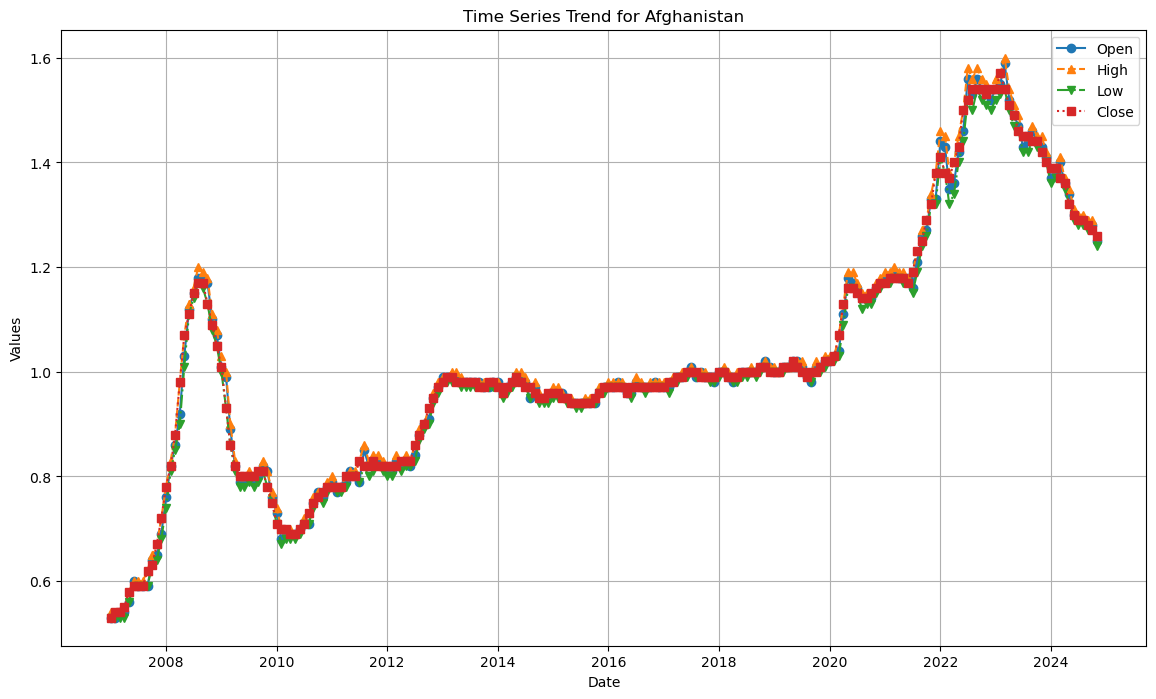

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Drop missing values in the main columns
data.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Select a country for analysis (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country]

# Plot time series trends for Open, High, Low, and Close values
plt.figure(figsize=(14, 8))
plt.plot(country_data['date'], country_data['Open'], label='Open', marker='o', linestyle='-')
plt.plot(country_data['date'], country_data['High'], label='High', marker='^', linestyle='--')
plt.plot(country_data['date'], country_data['Low'], label='Low', marker='v', linestyle='-.')
plt.plot(country_data['date'], country_data['Close'], label='Close', marker='s', linestyle=':')

# Add title and labels
plt.title(f'Time Series Trend for {country}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


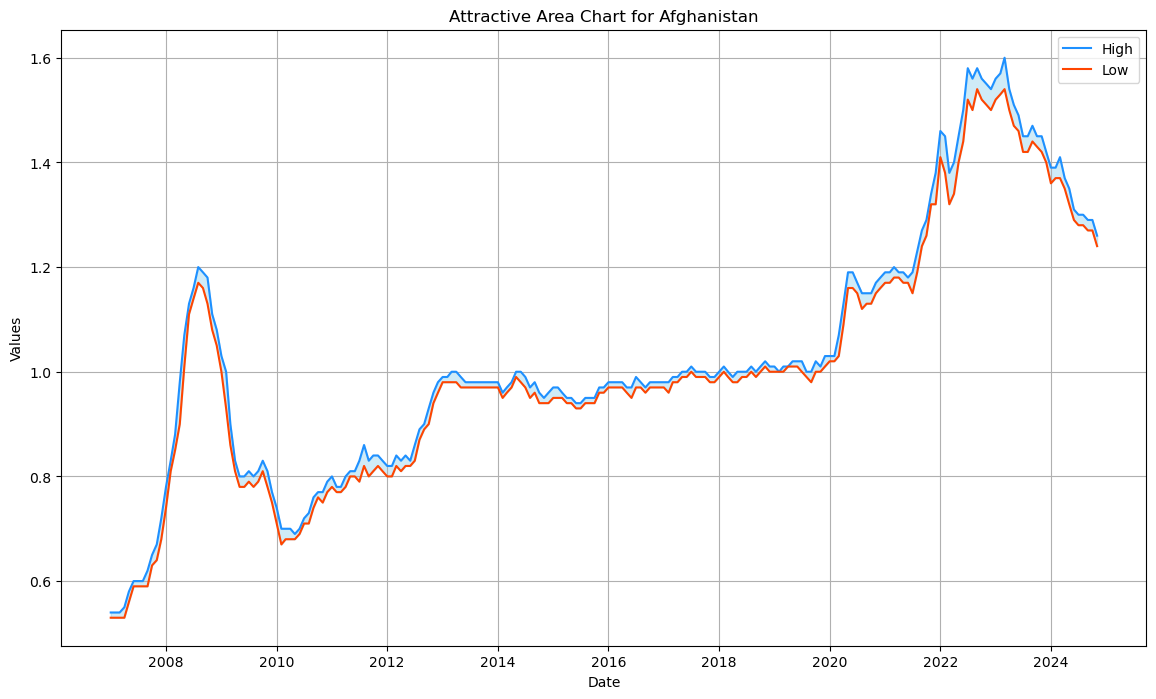

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')
data['date'] = pd.to_datetime(data['date'])
data.dropna(subset=['Open', 'High', 'Low', 'Close'], inplace=True)

# Select a country for analysis (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country]

# Plot area chart with multiple colors
plt.figure(figsize=(14, 8))
plt.fill_between(country_data['date'], country_data['High'], country_data['Low'], color="skyblue", alpha=0.4)
plt.plot(country_data['date'], country_data['High'], color="dodgerblue", label="High")
plt.plot(country_data['date'], country_data['Low'], color="orangered", label="Low")

# Add title and labels
plt.title(f'Attractive Area Chart for {country}')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [6]:
import pandas as pd
import plotly.express as px

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')

# Ensure country names and inflation data exist
data = data[['country', 'Inflation']].dropna()

# Plot map chart for inflation
fig = px.choropleth(data, locations="country", locationmode="country names",
                    color="Inflation", 
                    color_continuous_scale=px.colors.sequential.OrRd,
                    title="Global Inflation Heatmap")

# Customize the color range and layout
fig.update_geos(showcoastlines=False, projection_type="natural earth")
fig.update_layout(coloraxis_colorbar=dict(title="Inflation Rate"))
fig.show()


In [11]:

import pandas as pd
import plotly.graph_objects as go

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')


# Select a specific country (e.g., Afghanistan) and filter for available data
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Inflation'])

# Check if data is available for the selected indicators in the chosen country
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract last available values for each indicator
    open_value = country_data['Open'].values[-1]
    high_value = country_data['High'].values[-1]
    low_value = country_data['Low'].values[-1]
    inflation = country_data['Inflation'].values[-1]

    # Define directions and values
    categories = ['Open', 'High', 'Low', 'Inflation']
    values = [open_value, high_value, low_value, inflation]

    # Create polar plot (economic compass)
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name='Economic Indicators'
    ))

    # Customize layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(values) * 1.2])
        ),
        title=f"Economic Compass for {country}",
        showlegend=False
    )

    fig.show()

In [14]:

import pandas as pd
import plotly.graph_objects as go

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')


# Filter data for a specific country (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Inflation'])

# Check if data is available
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract data
    dates = pd.to_datetime(country_data['date']).dt.strftime('%Y-%m-%d').values
    indicators = ['Open', 'High', 'Low', 'Inflation']
    values = np.array([
        country_data['Open'].values,
        country_data['High'].values,
        country_data['Low'].values,
        country_data['Inflation'].values
    ])

    # Create mesh grid for 3D surface
    X, Y = np.meshgrid(np.arange(len(dates)), np.arange(len(indicators)))
    Z = values

    # Create 3D surface plot
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

    # Customize layout
    fig.update_layout(
        title=f"Economic Growth Surface for {country}",
        scene=dict(
            xaxis=dict(title='Date', tickvals=np.arange(len(dates)), ticktext=dates),
            yaxis=dict(title='Indicators', tickvals=np.arange(len(indicators)), ticktext=indicators),
            zaxis=dict(title='Value')
        )
    )

    fig.show()


In [15]:

# Filter data for a specific country (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Inflation'])

# Check if data is available
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract data for indicators
    dates = pd.to_datetime(country_data['date']).dt.strftime('%Y-%m').values
    indicators = ['Open', 'High', 'Low', 'Inflation']

    # Create polar chart with time slices
    fig = go.Figure()

    for i, date in enumerate(dates):
        values = [
            country_data['Open'].values[i],
            country_data['High'].values[i],
            country_data['Low'].values[i],
            country_data['Inflation'].values[i]
        ]

        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=indicators,
            fill='toself',
            name=date,
            opacity=0.6  # Reduce opacity for overlapping effect
        ))

    # Customize layout
    fig.update_layout(
        title=f"Sun-Style Economic Cycle for {country}",
        polar=dict(radialaxis=dict(visible=True, range=[0, max(country_data[['Open', 'High', 'Low', 'Inflation']].max())])),
        showlegend=True
    )

    fig.show()

In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')


# Filter out countries with missing inflation or price data
data = data.dropna(subset=['Open', 'Close', 'Inflation'])

# Replace negative inflation values with 0
data['Inflation'] = data['Inflation'].apply(lambda x: max(x, 0))

# Calculate mean price (Open + Close) / 2 for each country and date
data['Mean_Price'] = (data['Open'] + data['Close']) / 2

# Define the latest date for each country to create a snapshot of the latest data
latest_data = data.groupby('country').apply(lambda x: x.loc[x['date'].idxmax()])

# Create scatter plot for competitive countries with size representing Inflation and color for Mean_Price
fig = px.scatter(
    latest_data, x="Inflation", y="Mean_Price",
    size="Inflation", color="Mean_Price", hover_name="country",
    log_x=True, size_max=60,
    title="Competitive Economic Landscape"
)

# Customize layout
fig.update_layout(
    xaxis_title="Inflation Rate",
    yaxis_title="Average Price (Mean of Open & Close)",
    template="plotly_dark",
    showlegend=False
)

# Show plot
fig.show()

fig.show()


C:\Users\fatem\AppData\Local\Temp\ipykernel_2328\1295235945.py:20: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [30]:

data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')


# Select a specific country (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Close'])

# Check if data is available
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract latest values for each indicator
    latest_data = country_data.iloc[-1]
    open_value = latest_data['Open']
    high_value = latest_data['High']
    low_value = latest_data['Low']
    close_value = latest_data['Close']

    # Define indicators and values
    indicators = ['Open', 'High', 'Low', 'Close']
    values = [open_value, high_value, low_value, close_value]

    # Create polar plot (price compass)
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=indicators,
        fill='toself',
        name='Price Indicators'
    ))

    # Customize layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(values) * 1.2])
        ),
        title=f"Price Compass for {country}",
        showlegend=False
    )

    # Show the plot
    fig.show()

In [21]:

# Select a specific country (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Close', 'Inflation'])

# Check if data is available
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract latest values for each indicator
    latest_data = country_data.iloc[-1]
    open_value = latest_data['Open']
    high_value = latest_data['High']
    low_value = latest_data['Low']
    close_value = latest_data['Close']
    inflation = latest_data['Inflation']

    # Define indicators and values
    indicators = ['Open', 'High', 'Low', 'Close']
    values = [open_value, high_value, low_value, close_value]

    # Adjust values based on inflation (scaling effect)
    scaled_values = [v * (1 + inflation / 100) for v in values]

    # Create radar chart (ripple effect with inflation scaling)
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=scaled_values,
        theta=indicators,
        fill='toself',
        name='Economic Indicators'
    ))

    # Customize layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(scaled_values) * 1.2])
        ),
        title=f"Inflation-Adjusted Economic Radar for {country}",
        showlegend=False
    )

    # Show the plot
    fig.show()

In [29]:


data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')

# Select a specific country (example: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Close', 'Inflation'])

# Check if data is available
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # Extract latest values for each indicator
    latest_data = country_data.iloc[-1]
    open_value = latest_data['Open']
    high_value = latest_data['High']
    low_value = latest_data['Low']
    close_value = latest_data['Close']
    inflation = latest_data['Inflation']

    # Define indicators and values
    indicators = ['Open', 'High', 'Low', 'Close']
    values = [open_value, high_value, low_value, close_value]

    # Determine color based on inflation (gradient from green to red)
    color_scale = 'RdYlGn_r'  # Reverse "Red-Yellow-Green" color scale
    color_intensity = min(max((inflation / 100), 0), 1)  # Normalize inflation to 0-1 range

    # Create sunburst-style plot
    fig = go.Figure(go.Barpolar(
        r=values,
        theta=[0, 90, 180, 270],
        marker=dict(
            color=[color_intensity] * len(values),
            colorscale=color_scale,
            cmin=0,
            cmax=1
        ),
        text=indicators,
        hoverinfo='text+r'
    ))

    # Customize layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[0, max(values) * 1.2])
        ),
        title=f"Economic Sun for {country}",
        showlegend=False,
        template="plotly_dark"
    )

    # Show the plot
    fig.show()

In [31]:
import pandas as pd
from lightning import LightningChart

# بارگذاری داده‌ها
data = pd.read_csv('WLD_RTFP_country_2024-11-04.csv')

# انتخاب یک کشور (مثال: Afghanistan)
country = 'Afghanistan'
country_data = data[data['country'] == country].dropna(subset=['Open', 'High', 'Low', 'Close', 'Inflation'])

# بررسی داده‌ها
if country_data.empty:
    print("No data available for the specified indicators in this country.")
else:
    # استخراج سری‌های زمانی و داده‌ها
    dates = pd.to_datetime(country_data['date']).values
    open_values = country_data['Open'].values
    high_values = country_data['High'].values
    low_values = country_data['Low'].values
    close_values = country_data['Close'].values
    
    # ایجاد نمودار با LightningChart
    chart = LightningChart().ChartXY()
    chart.setTitle(f"Economic Indicators for {country} with Custom Colors")
    
    # اضافه کردن داده‌های 'Open' با رنگ sandy brown
    open_series = chart.addLineSeries()
    open_series.setName('Open')
    open_series.setStrokeStyle(color='sandybrown')
    open_series.addPoints(dates, open_values)
    
    # اضافه کردن داده‌های 'High' با رنگ slate blue
    high_series = chart.addLineSeries()
    high_series.setName('High')
    high_series.setStrokeStyle(color='slateblue')
    high_series.addPoints(dates, high_values)
    
    # اضافه کردن داده‌های 'Low' با رنگ sea green
    low_series = chart.addLineSeries()
    low_series.setName('Low')
    low_series.setStrokeStyle(color='seagreen')
    low_series.addPoints(dates, low_values)
    
    # اضافه کردن داده‌های 'Close' با رنگ tomato
    close_series = chart.addLineSeries()
    close_series.setName('Close')
    close_series.setStrokeStyle(color='tomato')
    close_series.addPoints(dates, close_values)
    
    # تنظیم عنوان محورهای X و Y
    chart.setAxisXTitle("Date")
    chart.setAxisYTitle("Values")
    
    # تنظیم تم نمودار به Dark
    chart.setTheme('Dark')
    
    # نمایش نمودار
    chart.open()



In [32]:
import pandas as pd
import plotly.express as px

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')

# Calculate mean price (average of Open and Close) for each country and date
data['Mean_Price'] = (data['Open'] + data['Close']) / 2

# Select relevant columns
data = data[['country', 'ISO3', 'date', 'Inflation', 'Mean_Price']]

# Convert date column to datetime format for Plotly
data['date'] = pd.to_datetime(data['date'])

# Create a dynamic map with time slider
fig = px.choropleth(
    data_frame=data,
    locations='ISO3',            # ISO country codes
    color='Inflation',           # Color by Inflation rate
    hover_name='country',        # Hover information
    hover_data={'Mean_Price': True, 'ISO3': False},
    animation_frame=data['date'].dt.year,  # Time slider by year
    projection='natural earth',  # Map projection
    title="Global Inflation and Mean Price Over Time"
)

# Customize color scale and layout
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(
    coloraxis_colorbar=dict(title="Inflation Rate"),
    template="plotly_dark"
)

# Show the map
fig.show()


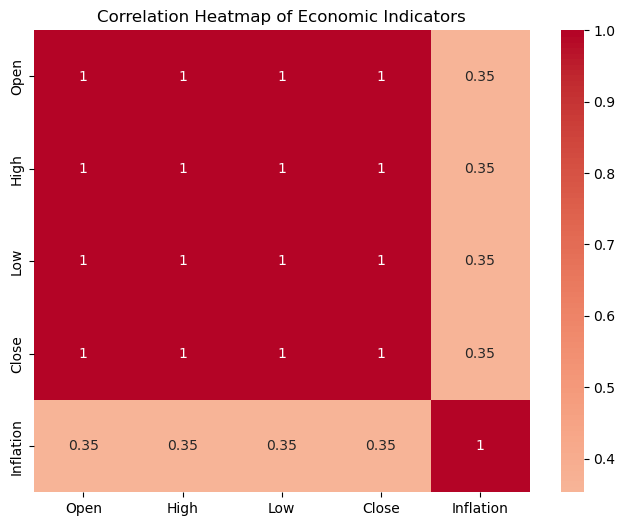

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('../dataset/WLD_RTFP_country_2024-11-04.csv')

# Filter for numeric columns only
numeric_data = data[['Open', 'High', 'Low', 'Close', 'Inflation']]

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()


Remaining null values:
 Open           0
High           0
Low            0
Close          0
Inflation    511
country        0
ISO3           0
date           0
dtype: int64


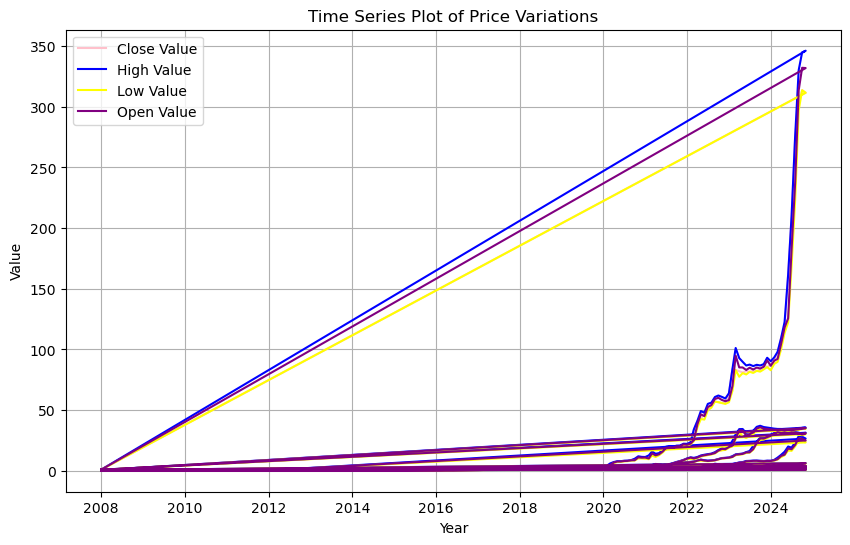

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '../dataset/WLD_RTFP_country_2024-11-04.csv'  # Update with the correct file path
df = pd.read_csv(file_path)

# Fill missing values in 'Open', 'High', 'Low', and 'Close' columns with their respective mode
mode_open = df['Open'].mode().iloc[0]
df['Open'] = df['Open'].fillna(value=mode_open)

mode_close = df['Close'].mode().iloc[0]
df['Close'] = df['Close'].fillna(value=mode_close)

mode_high = df['High'].mode().iloc[0]
df['High'] = df['High'].fillna(value=mode_high)

mode_low = df['Low'].mode().iloc[0]
df['Low'] = df['Low'].fillna(value=mode_low)

# Check for remaining null values
print("Remaining null values:\n", df.isnull().sum())

# Convert 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Drop any remaining rows with null values after filling
df = df.dropna(axis=0)

# Plotting the time series for 'Open', 'High', 'Low', and 'Close'
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Value', color='pink')
plt.plot(df['High'], label='High Value', color='blue')
plt.plot(df['Low'], label='Low Value', color='yellow')
plt.plot(df['Open'], label='Open Value', color='purple')

# Add title and labels
plt.title('Time Series Plot of Price Variations')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import lightningchart as lc
from datetime import datetime

# Load the dataset
file_path = '../dataset/WLD_RTFP_country_2024-11-04.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# تبدیل ستون تاریخ به فرمت زمانی و استخراج سال و ماه
data['date'] = pd.to_datetime(data['date'])
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month

# محاسبه میانگین قیمت Close برای هر ماه در طول سال‌ها
monthly_avg = data.groupby(['Year', 'Month'])['Close'].mean().unstack()

# ایجاد نمودار خطی
chart = lc.ChartXY()
chart.set_title("Monthly Close Prices Trend Over Years")

# افزودن داده‌های هر ماه به نمودار
for month in monthly_avg.columns:
    chart.add_line_series(
        dataX=monthly_avg.index,
        dataY=monthly_avg[month],
        name=datetime(1900, month, 1).strftime('%B')  # نمایش نام ماه به صورت متنی
    )

# تنظیمات نهایی
chart.set_as("Year")
chart.setAxisYTitle("Average Close Price")
chart.setTheme('Light')
chart.open()


AttributeError: 'ChartXY' object has no attribute 'setTitle'

In [2]:
import pandas as pd
import lightningchart as lc
import numpy as np

# بارگذاری داده‌ها از فایل اکسل
file_path = '../dataset/WLD_RTFP_country_2024-11-04.csv'  # مسیر فایل اکسل
df = pd.read_csv(file_path)

with open('D:/fatemeh_ajam/lightningChart/A/license-key', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)


# اطمینان از اینکه تاریخ به درستی فرمت شده است
df['date'] = pd.to_datetime(df['date'])

# ایجاد نمودار شمعی
chart = lc.ChartXY(theme=lc.Themes.Light)

# رسم شمع‌ها
for i in range(len(df)):
    open_price = df['Open'][i]
    close_price = df['Close'][i]
    high_price = df['High'][i]
    low_price = df['Low'][i]
    date = df['date'][i].timestamp()  # تبدیل به timestamp

    # تعیین رنگ مستطیل (سبز برای افزایش، قرمز برای کاهش)
    color = lc.Color(0, 150, 0, 255) if close_price >= open_price else lc.Color(150, 0, 0, 255)

    # رسم خط بالا و پایین
    chart.add_line_series().add([date, high_price], [date, low_price], color='black', lineWidth=1)

    # رسم مستطیل برای قیمت‌های باز و بسته
    rect = chart.add_rectangle_series().add(
        x1=date, y1=open_price, 
        x2=date + 86400, y2=close_price  # اضافه کردن 86400 ثانیه برای یک روز
    )
    rect.set_color(color)  # تنظیم رنگ مستطیل

# تنظیم تاریخ برای محور X
x_axis = chart.get_default_x_axis()
x_axis.set_interval(df['date'].min().timestamp(), df['date'].max().timestamp())  # تنظیم محدوده محور X
x_axis.set_title('تاریخ')
x_axis.set_tick_strategy('DateTime', utc=True)  # استفاده از فرمت DateTime برای محور X

# تنظیم عنوان و محورها
chart.set_title('نمودار شمعی از داده‌های اکسل')
chart.get_default_y_axis().set_title('قیمت')

# نمایش نمودار
chart.open()


127.0.0.1 - - [08/Nov/2024 02:02:59] "GET / HTTP/1.1" 200 -


In [1]:
import pandas as pd
import lightningchart as lc
import numpy as np

# بارگذاری داده‌ها از فایل CSV
file_path = '../dataset/WLD_RTFP_country_2024-11-04.csv'  # مسیر فایل CSV
df = pd.read_csv(file_path)

# اطمینان از اینکه تاریخ به درستی فرمت شده است
df['date'] = pd.to_datetime(df['date'])

# ایجاد نمودار شمعی
chart = lc.ChartXY(theme=lc.Themes.Light)

# رسم شمع‌ها
for i in range(len(df)):
    open_price = df['Open'][i]
    close_price = df['Close'][i]
    high_price = df['High'][i]
    low_price = df['Low'][i]
    date = int(df['date'][i].timestamp() * 1000)  # تبدیل به timestamp به میلی‌ثانیه

    # تعیین رنگ مستطیل (سبز برای افزایش، قرمز برای کاهش)
    color = lc.Color(0, 150, 0, 255) if close_price >= open_price else lc.Color(150, 0, 0, 255)

    # رسم خط بالا و پایین
    chart.add_line_series().add([date, high_price], [date, low_price], color='black', lineWidth=1)

    # رسم مستطیل برای قیمت‌های باز و بسته
    rect = chart.add_rectangle_series().add(
        x1=date, y1=open_price, 
        x2=date + 86400000, y2=close_price  # اضافه کردن 86400000 میلی‌ثانیه برای یک روز
    )
    rect.set_color(color)  # تنظیم رنگ مستطیل

# تنظیم تاریخ برای محور X
x_axis = chart.get_default_x_axis()
x_axis.set_interval(int(df['date'].min().timestamp() * 1000), int(df['date'].max().timestamp() * 1000))  # تنظیم محدوده محور X
x_axis.set_title('تاریخ')
x_axis.set_tick_strategy('DateTime', utc=True)  # استفاده از فرمت DateTime برای محور X

# تنظیم عنوان و محورها
chart.set_title('نمودار شمعی از داده‌های اکسل')
chart.get_default_y_axis().set_title('قیمت')

# نمایش نمودار
chart.open()


127.0.0.1 - - [08/Nov/2024 02:02:35] "GET / HTTP/1.1" 200 -
